In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import geopandas as gp
from datetime import datetime
# Set the column width
pd.set_option('max_colwidth', 400)

### Extract the quality of life.xlsx Data

In [3]:
# Read the QOL data into a Pandas DataFrame
QOL_df = pd.read_csv('Resources/Quality_of_Life.csv')
QOL_df.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


In [4]:
# Get a brief summary of the QOL DataFrame.
QOL_df.info()
QOL_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Traffic Commute Time Value,Pollution Value
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,55.573305,55.274449,54.731568,37.598178,37.526314,28.492966,54.266186
std,52.008245,16.914298,20.607381,40.851542,26.026565,17.347242,25.853695
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000
25%,16.340000,43.857500,45.807500,0.000000,24.550000,17.100000,35.700000
50%,42.930000,54.635000,57.150000,0.000000,36.895000,29.845000,59.765000
75%,85.940000,68.132500,68.447500,79.332500,51.090000,38.870000,73.740000
max,281.830000,100.000000,100.000000,99.890000,137.370000,100.000000,106.900000


In [5]:
# Read the WHR data into a Pandas DataFrame
WHR_df = pd.read_csv('Resources/world-happiness-report.csv')
WHR_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
# Clean WHR_df to retain wanted columns
Cleaned_WHR_df = WHR_df[["Country name", "Regional indicator", "Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", 
                         "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Ladder score in Dystopia", "Explained by: Log GDP per capita",
                         "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity",
                        "Explained by: Perceptions of corruption", "Dystopia + residual"]]
Cleaned_WHR_df.head()

# Ladder scores(0-10) is worst possible life to worst possible life. Pts are asked to rate their life position on that ladder aka measure their overall life satisfaction

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
# Read the Gini Coefficient data into a Pandas DataFrame
Gini_df = pd.read_csv('Resources/Gini_coefficient.csv')
Gini_df.head()

,name,slug,value,date_of_information,ranking,region
0,South Africa,south-africa,63.0,2014,1,Africa
1,Namibia,namibia,59.1,2015,2,Africa
2,Colombia,colombia,54.8,2022,3,South America
3,Eswatini,eswatini,54.6,2016,4,Africa
4,Hong Kong,hong-kong,53.9,2016,5,East and Southeast Asia


In [8]:
# Clean Gini_df to retain wanted columns and rename date_of_information column
Cleaned_Gini_df = Gini_df[["name", "value", "date_of_information"]].rename(columns={"date_of_information": "year"})
Cleaned_Gini_df.head()

,name,value,year
0,South Africa,63.0,2014
1,Namibia,59.1,2015
2,Colombia,54.8,2022
3,Eswatini,54.6,2016
4,Hong Kong,53.9,2016


In [9]:
# Read the Population data into a Pandas DataFrame
Population_df = pd.read_csv('Resources/Population.csv')
Population_df.head()

,name,slug,value,date_of_information,ranking,region
0,China,china,"1,397,897,720",July 2021 est.,1,East Asia/Southeast Asia
1,India,india,"1,339,330,514",July 2021 est.,2,South Asia
2,United States,united-states,"334,998,398",July 2021 est.,3,North America
3,Indonesia,indonesia,"275,122,131",July 2021 est.,4,East Asia/Southeast Asia
4,Pakistan,pakistan,"238,181,034",July 2021 est.,5,South Asia


In [10]:
# Clean Population_df to retain wanted columns and rename date_of_information column
Cleaned_Population_df = Population_df[["name", "value", "date_of_information"]].rename(columns={"date_of_information": "year", "name": "Country name"})
Cleaned_Population_df["year"] = [x["year"].split(" ")[1] for i,x in Cleaned_Population_df.iterrows()]
Cleaned_Population_df.head()

,Country name,value,year
0,China,"1,397,897,720",2021
1,India,"1,339,330,514",2021
2,United States,"334,998,398",2021
3,Indonesia,"275,122,131",2021
4,Pakistan,"238,181,034",2021


In [11]:
Cleaned_Population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country name  236 non-null    object
 1   value         236 non-null    object
 2   year          236 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


In [12]:
# Merge the data on the country name
merged_df = pd.merge (QOL_df, WHR_df, left_on= "country", right_on= "Country name", how="inner")
merged_df

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,...,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
1,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,...,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
2,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,...,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
3,Argentina,40.36,'Low',36.36,'Low',68.00,'High',98.28,'Very High',32.65,...,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
4,Armenia,36.91,'Very Low',77.81,'High',58.07,'Moderate',63.42,'High',41.84,...,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Venezuela,15.11,'Very Low',19.26,'Very Low',38.69,'Low',0.00,NaN,35.85,...,-0.169,0.827,2.43,0.852,0.897,0.574,0.284,0.078,0.072,2.135
137,Vietnam,44.49,'Low',59.00,'Moderate',61.32,'High',71.24,'High',26.85,...,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
138,Yemen,20.74,'Very Low',34.07,'Low',25.31,'Low',0.00,NaN,48.66,...,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
139,Zambia,22.32,'Very Low',54.39,'Moderate',54.44,'Moderate',0.00,NaN,36.74,...,0.061,0.823,2.43,0.528,0.552,0.231,0.487,0.227,0.074,1.975


In [13]:
# Merge the merged_df (contains QOL, world-happiness-report) with the Population dataset on the country name
main_merged_df = pd.merge (merged_df, Cleaned_Population_df, left_on= "Country name", right_on= "Country name", how="inner")
main_merged_df
main_merged_df.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,value,year
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,...,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,"37,466,414",2021
1,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,...,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250,"3,088,385",2021
2,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,...,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242,"43,576,691",2021
3,Argentina,40.36,'Low',36.36,'Low',68.00,'High',98.28,'Very High',32.65,...,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461,"45,864,941",2021
4,Armenia,36.91,'Very Low',77.81,'High',58.07,'Moderate',63.42,'High',41.84,...,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127,"3,011,609",2021


In [14]:
main_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     135 non-null    object 
 1   Purchasing Power Value                      135 non-null    float64
 2   Purchasing Power Category                   127 non-null    object 
 3   Safety Value                                135 non-null    float64
 4   Safety Category                             135 non-null    object 
 5   Health Care Value                           135 non-null    float64
 6   Health Care Category                        134 non-null    object 
 7   Climate Value                               135 non-null    float64
 8   Climate Category                            102 non-null    object 
 9   Cost of Living Value                        135 non-null    float64
 10  Cost of Living

In [15]:
# Change the population value from object to float64
main_merged_df["value"] = main_merged_df["value"].str.replace(",", "").astype(float)


In [16]:
# Compute weighted happiness per region 
regional_happiness = main_merged_df.groupby("Regional indicator").apply(lambda x: np.average(x["Ladder score"], weights=x["value"]))
print(regional_happiness)

Regional indicator
Central and Eastern Europe            6.047667
Commonwealth of Independent States    5.485339
East Asia                             5.388822
Latin America and Caribbean           6.077531
Middle East and North Africa          4.850220
North America and ANZ                 6.984146
South Asia                            4.076092
Southeast Asia                        5.516257
Sub-Saharan Africa                    4.522950
Western Europe                        6.864194
dtype: float64


C:\Users\deysi\AppData\Local\Temp\ipykernel_10172\3397330370.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_happiness = main_merged_df.groupby("Regional indicator").apply(lambda x: np.average(x["Ladder score"], weights=x["value"]))


In [17]:
# Find total # of unique regions
unique_regions = main_merged_df["Regional indicator"].unique()

# Print the # of unique regions and a list of them
print("Total number of regions:", len(unique_regions))
print("Region names:", unique_regions)


Total number of regions: 10
Region names: ['South Asia' 'Central and Eastern Europe' 'Middle East and North Africa'
 'Latin America and Caribbean' 'Commonwealth of Independent States'
 'North America and ANZ' 'Western Europe' 'Sub-Saharan Africa'
 'Southeast Asia' 'East Asia']


In [18]:
# Total number of countries in dataset
unique_countries = main_merged_df["Country name"].unique()
print("Total number of countries:", len(unique_countries))
print("Country Names:", unique_countries)

Total number of countries: 135
Country Names: ['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Benin'
 'Bolivia' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia' 'Finland' 'France'
 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho'
 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi'
 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico'
 'Moldova' 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique' 'Namibia'
 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'

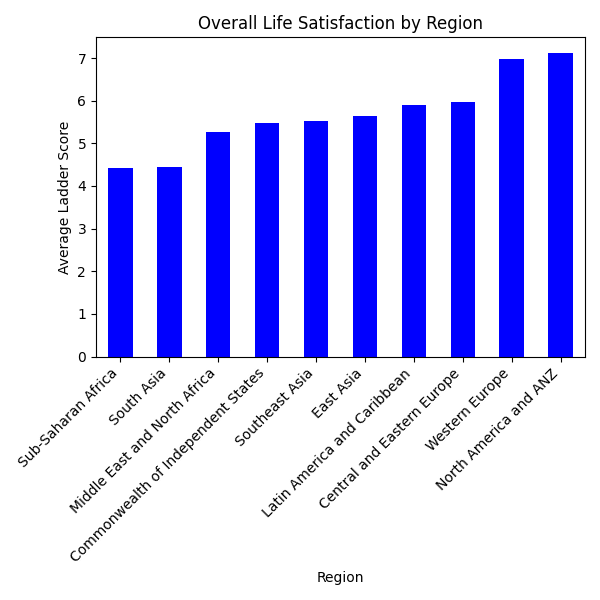

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regional_ladder = main_merged_df.groupby("Regional indicator")["Ladder score"].mean().sort_values()

pandas_plot = regional_ladder.plot(kind = "bar", facecolor = "blue", figsize = (6, 6), width = 0.5,
                                title = "Overall Life Satisfaction by Region",
                                xlabel = "Region",
                                ylabel = "Average Ladder Score"
                                
                        )
# Adjust layout and display the plot
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [20]:
# Adding a new column for Health Care to Life Expectancy Ratio
main_merged_df["Health Care to Life Expectancy Ratio"] = main_merged_df["Health Care Value"] / main_merged_df["Healthy life expectancy"]

# #Displaying the first few rows of the merged DataFrame
main_merged_df[["Country name", "Health Care to Life Expectancy Ratio"]].head(20)

,Country name,Health Care to Life Expectancy Ratio
0,Afghanistan,0.461776
1,Albania,0.698706
2,Algeria,0.824634
3,Argentina,0.985507
4,Armenia,0.866006
5,Australia,0.992558
6,Austria,1.061801
7,Azerbaijan,0.735805
8,Bahrain,0.958342
9,Bangladesh,0.651235


In [ ]:
# GDP to Happiness Ratio; measures how much GDP per capita is required to achieve a given happiness level.


In [ ]:
# Cost of Living vs. Happiness

In [ ]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[["category", "subcategory"]] = crowdfunding_info_df["category & sub-category"].str.split("/",n=2,expand=True)
crowdfunding_info_df

In [ ]:
# Get the unique categories and subcategories in separate lists.
categories =[x for x in crowdfunding_info_df["category"].unique()]
subcategories =[x for x in crowdfunding_info_df["subcategory"].unique()]

print(categories)
print(subcategories)

In [ ]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

In [ ]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

In [ ]:
# Use a list comprehension to add "cat" to each category_id.
cat_ids = ["cat"+str(x) for x in category_ids]
scat_ids = ["subcat"+str(x) for x in subcategory_ids]
# Use a list comprehension to add "subcat" to each subcategory_id.


print(cat_ids)
print(scat_ids)

In [ ]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df = pd.DataFrame()
category_df ["category_id"]= [x for x in cat_ids]
category_df ["category"]=[x for x in categories]

# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name.
subcategory_df = pd.DataFrame()
subcategory_df ["subcategory_id"]= [x for x in scat_ids]
subcategory_df ["subcategory"]=[x for x in subcategories]

In [ ]:
# View the category_df
category_df

In [ ]:
# View the subcategory_df
subcategory_df

In [ ]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
* The "cf_id" column
* The "contact_id" column
* The "company_name" column
* The "blurb" column, renamed to "description"
* The "goal" column, converted to the `float` data type
* The "pledged" column, converted to the `float` data type
* The "outcome" column
* The "backers_count" column
* The "country" column
* The "currency" column
* The "launched_at" column, renamed to "launch_date" and with the UTC times converted to the `datetime` format
* The "deadline" column, renamed to "end_date" and with the UTC times converted to the `datetime` format
* The "category_id" column, with unique identification numbers matching those in the "category_id" column of the category DataFrame
* The "subcategory_id" column, with the unique identification numbers matching those in the "subcategory_id" column of the subcategory DataFrame
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [ ]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df.
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

In [ ]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df.rename(columns={'blurb':'description','launched_at':'launch_date','deadline':'end_date'}, inplace=True)
campaign_df.head()

In [ ]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df["goal"] =campaign_df["goal"].astype('float')
campaign_df["pledged"] =campaign_df["pledged"].astype('float')
campaign_df.head()

In [ ]:
# Check the datatypes
campaign_df.info()

In [ ]:
# Format the launch_date and end_date columns to datetime format
campaign_df["launch_date"] = pd.to_datetime(campaign_df["launch_date"], unit='s')
campaign_df["end_date"] = pd.to_datetime(campaign_df["end_date"], unit='s')
campaign_df.head()

In [ ]:
# Merge the campaign_df with the category_df on the "category" column and
# the subcategory_df on the "subcategory" column.
first_merged_df = pd.merge(campaign_df,category_df, on='category')
campaign_merged_df = pd.merge(first_merged_df,subcategory_df,on="subcategory")
campaign_merged_df.tail(10)

In [ ]:
# Drop unwanted columns, including 'staff_pick' and 'spotlight'
campaign_cleaned = campaign_merged_df.drop(['staff_pick','spotlight','category & sub-category','category', 'subcategory'], axis=1)
campaign_cleaned.head(5)

In [ ]:
# Export the DataFrame as a CSV file.
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

### Extract the contacts.xlsx Data.

In [ ]:
# Read the data into a Pandas DataFrame. Use the `header=3` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=3)
contact_info_df.head()

### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [ ]:
import json
dict_values = []

# Iterate through the contact_info_df and convert each row to a dictionary.
for i, row in contact_info_df.iterrows():
    data = row['contact_info']  

    # Append the converted row to a list.
    dict_values.append(json.loads(data))

# Print out the list of dictionaries
print(dict_values)

In [ ]:
# Create a contacts_df DataFrame from the list of dictionaries
contacts_df = pd.DataFrame(dict_values)
contacts_df.head(5) 

In [ ]:
# Check the datatypes.
contacts_df.info()

In [ ]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column.
contacts_df["first_name"] = [x["name"].split(" ")[0] for i,x in contacts_df.iterrows()]
contacts_df["last_name"] = [x["name"].split(" ")[1] for i,x in contacts_df.iterrows()]

# Drop the contact_name column
contacts_df = contacts_df.drop('name',axis=1)
contacts_df.head(10)

In [ ]:
# Reorder the columns
contacts_df_clean = contacts_df[['contact_id','first_name','last_name','email']]

contacts_df_clean.head(10) # the starter code had print function but the print function gives as same result in different format


In [ ]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df_clean.info()

In [ ]:
# Export the DataFrame as a CSV file.
contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [ ]:
contact_info_df_copy = contact_info_df.copy()
contact_info_df_copy.head()

In [ ]:
# Extract the four-digit contact ID number.
import re
contact_info_df_copy['contact_id'] = [re.search(r'\s\d{4}',x['contact_info']).group() for i,x in contact_info_df_copy.iterrows()]
contact_info_df_copy.head(5)

In [ ]:
# Check the datatypes.
contact_info_df_copy.info()

In [ ]:
# Convert the "contact_id" column to an int64 data type using `pd.to_numeric`.
contact_info_df_copy['contact_id'] = pd.to_numeric(contact_info_df_copy['contact_id'])
contact_info_df_copy.info()

In [ ]:
# Extract the name of the contact and add it to a new column.
p = "([A-Za-z]+) ([A-Za-z]+)"
contact_info_df_copy['name'] = [re.search(p,x['contact_info']).group() for i,x in contact_info_df_copy.iterrows()]
contact_info_df_copy.head(10)

In [ ]:
# Extract the email from the contacts and add the values to a new column.
contact_info_df_copy['email'] = contact_info_df_copy['contact_info'].str.extract(r'"(\S+@\S+)"}')
contact_info_df_copy.head(10)


In [ ]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.
cleaned_contact_info_df = contact_info_df_copy.drop("contact_info", axis=1)
cleaned_contact_info_df.head(10)

In [ ]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column.
cleaned_contact_info_df['first_name'] = cleaned_contact_info_df['name'].str.extract(r'^(\w+)')
cleaned_contact_info_df['last_name'] = cleaned_contact_info_df['name'].str.extract(r'\s(\w+)')

# Drop the contact_name column
final_cleaned_df = cleaned_contact_info_df.drop('name',axis=1)
final_cleaned_df.head(10)

In [ ]:
# Reorder the columns
contacts_df_clean = final_cleaned_df[['contact_id','first_name','last_name','email']]
contacts_df_clean.head(10)

In [ ]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df_clean.info()

In [ ]:
# Export the DataFrame as a CSV file.
contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)